In [1]:
from __future__ import print_function
# if our large test file is available, use it. Otherwise, use file generated from toy_mistis_1_setup_run.ipynb
import os
test_file = "../toy_mistis_1k_OPS1.nc"
filename = test_file if os.path.isfile(test_file) else "mistis.nc"

In [2]:
print(filename)

../toy_mistis_1k_OPS1.nc


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openpathsampling as paths

In [4]:
%%time
storage = paths.AnalysisStorage(filename)

CPU times: user 617 ms, sys: 108 ms, total: 725 ms
Wall time: 788 ms


In [5]:
mistis = storage.networks.load(0)

NameError: name 'storage' is not defined

In [6]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.01, 'bin_range' : (-0.35, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [7]:
%%time
scheme = storage.schemes[0]
scheme.move_summary(storage.steps)

pathreversal ran 25.354% (expected 25.38%) of the cycles with acceptance 22007/25354 (86.80%)
ms_outer_shooting ran 2.505% (expected 2.54%) of the cycles with acceptance 1484/2505 (59.24%)
shooting ran 48.313% (expected 48.22%) of the cycles with acceptance 36208/48313 (74.94%)
minus ran 0.967% (expected 1.02%) of the cycles with acceptance 724/967 (74.87%)
repex ran 22.861% (expected 22.84%) of the cycles with acceptance 8342/22861 (36.49%)
CPU times: user 14.6 s, sys: 331 ms, total: 15 s
Wall time: 14.8 s


In [8]:
scheme.move_summary(storage.steps, 'shooting')

OneWayShootingMover A->C 4 strict ran 2.603% (expected 2.54%) of the cycles with acceptance 1846/2603 (70.92%)
OneWayShootingMover B->A 5 strict ran 2.543% (expected 2.54%) of the cycles with acceptance 1593/2543 (62.64%)
OneWayShootingMover A->B 5 strict ran 2.586% (expected 2.54%) of the cycles with acceptance 1616/2586 (62.49%)
OneWayShootingMover A->B 0 strict ran 2.552% (expected 2.54%) of the cycles with acceptance 2147/2552 (84.13%)
OneWayShootingMover A->C 5 strict ran 2.580% (expected 2.54%) of the cycles with acceptance 1589/2580 (61.59%)
OneWayShootingMover A->C 0 strict ran 2.495% (expected 2.54%) of the cycles with acceptance 2092/2495 (83.85%)
OneWayShootingMover A->B 1 strict ran 2.519% (expected 2.54%) of the cycles with acceptance 2077/2519 (82.45%)
OneWayShootingMover A->C 6 strict ran 2.583% (expected 2.54%) of the cycles with acceptance 1496/2583 (57.92%)
OneWayShootingMover A->C 1 strict ran 2.600% (expected 2.54%) of the cycles with acceptance 2134/2600 (82.08%)
O

In [9]:
scheme.move_summary(storage.steps, 'minus')

Minus ran 0.510% (expected 0.51%) of the cycles with acceptance 507/510 (99.41%)
Minus ran 0.457% (expected 0.51%) of the cycles with acceptance 217/457 (47.48%)


In [10]:
scheme.move_summary(storage.steps, 'repex')

ReplicaExchange ran 1.302% (expected 1.27%) of the cycles with acceptance 674/1302 (51.77%)
ReplicaExchange ran 1.221% (expected 1.27%) of the cycles with acceptance 527/1221 (43.16%)
ReplicaExchange ran 1.251% (expected 1.27%) of the cycles with acceptance 282/1251 (22.54%)
ReplicaExchange ran 1.231% (expected 1.27%) of the cycles with acceptance 655/1231 (53.21%)
ReplicaExchange ran 1.202% (expected 1.27%) of the cycles with acceptance 382/1202 (31.78%)
ReplicaExchange ran 1.237% (expected 1.27%) of the cycles with acceptance 491/1237 (39.69%)
ReplicaExchange ran 1.304% (expected 1.27%) of the cycles with acceptance 690/1304 (52.91%)
ReplicaExchange ran 1.325% (expected 1.27%) of the cycles with acceptance 306/1325 (23.09%)
ReplicaExchange ran 1.294% (expected 1.27%) of the cycles with acceptance 528/1294 (40.80%)
ReplicaExchange ran 1.321% (expected 1.27%) of the cycles with acceptance 277/1321 (20.97%)
ReplicaExchange ran 1.315% (expected 1.27%) of the cycles with acceptance 324/13

In [11]:
# we need to load the states and the innermost interface for each transition
stateA = storage.volumes['A']
stateB = storage.volumes['B']
stateC = storage.volumes['C']
inner_AB = mistis.transitions[(stateA, stateB)].interfaces[0]
inner_AC = mistis.transitions[(stateA, stateC)].interfaces[0]
inner_BA = mistis.transitions[(stateB, stateA)].interfaces[0]

In [12]:
# got these from mistis_flux.ipynb
fluxes = {(stateA, inner_AB): 0.0916199741819,
          (stateA, inner_AC): 0.0915271110694,
          (stateB, inner_BA): 0.0916882528979}
mistis.set_fluxes(fluxes)

In [13]:
%%time
rate = mistis.rate_matrix(storage.steps, force=True)
rate

/Users/dwhs/Dropbox/msm-tis/openpathsampling/numerics/wham.py:336: RuntimeWarning: invalid value encountered in divide
  addends_k = np.divide(numerator_byQ, sum_over_Z_byQ)
/Users/dwhs/Dropbox/msm-tis/openpathsampling/numerics/wham.py:409: RuntimeWarning: invalid value encountered in double_scalars
  output[val] = sum_k_Hk_Q[val] / sum_w_over_Z


CPU times: user 17min 20s, sys: 10.2 s, total: 17min 30s
Wall time: 2h 44min 30s


In [35]:
import pandas as pd
pd.options.display.float_format = '{:.3e}'.format
rate

,A,B,C
A,NaN,1.509e-04,2.375e-04
B,1.709e-04,NaN,NaN


In [46]:
# this can be copy-pasted into an article
print(rate.to_latex(float_format='{:.3e}'.format))

\begin{tabular}{llll}
\toprule
{} &         A &         B &         C \\
\midrule
\textbf{A} &       NaN & 1.509e-04 & 2.375e-04 \\
\textbf{B} & 1.709e-04 &       NaN &       NaN \\
\bottomrule
\end{tabular}



In [14]:
trans = list(mistis.transitions.values())[2]
trans_hists = trans.histograms['max_lambda']
print(trans)

TISTransition: A->C
A -> A or C
Interface: -inf<opY<-0.35
Interface: -inf<opY<-0.3
Interface: -inf<opY<-0.27
Interface: -inf<opY<-0.24
Interface: -inf<opY<-0.2
Interface: -inf<opY<-0.1
Interface: -inf<opY<0.0



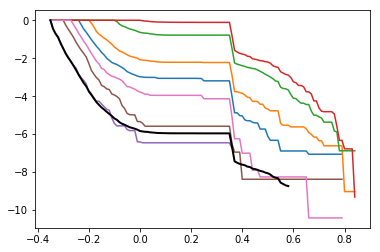

In [15]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp), '-k', lw=2)

In [16]:
len(storage.steps)

100001

In [17]:
#import logging.config
#logging.config.fileConfig("../resources/debug_logging.conf", disable_existing_loggers=False)

In [18]:
n_blocks = 1  # for testing code

In [19]:
#! skip
n_blocks = 5 # for real examples

In [20]:
resampling = paths.numerics.BlockResampling(storage.steps, n_blocks=n_blocks)

In [21]:
rate_df_func = lambda steps: mistis.rate_matrix(steps, force=True)

In [22]:
%%time
rates = paths.numerics.ResamplingStatistics(function=rate_df_func, inputs=resampling.blocks)

CPU times: user 3min 10s, sys: 2.93 s, total: 3min 13s
Wall time: 1h 30min 7s


In [37]:
rates.mean

,A,B,C
A,NaN,1.899e-04,2.464e-04
B,1.893e-04,NaN,NaN


In [38]:
rates.std

,A,B,C
A,nan,1.156e-04,9.804e-05
B,1.208e-04,nan,nan


In [39]:
rates.percentile(0)

,A,B,C
A,NaN,1.562e-05,1.041e-04
B,9.505e-05,NaN,NaN


In [40]:
rates.percentile(25)

,A,B,C
A,NaN,1.620e-04,1.635e-04
B,1.015e-04,NaN,NaN


In [41]:
rates.percentile(50)

,A,B,C
A,NaN,1.885e-04,2.845e-04
B,1.413e-04,NaN,NaN


In [42]:
rates.percentile(75)

,A,B,C
A,NaN,2.052e-04,3.086e-04
B,1.868e-04,NaN,NaN


In [43]:
rates.percentile(100)

,A,B,C
A,NaN,3.782e-04,3.714e-04
B,4.218e-04,NaN,NaN
